In [2]:
#Integrantes del Grupo = Christian Cavero - Franco Macri
#IA Utilizada para el TP = Chat GPT
#Relacion de la coleccion de datos =

#Descripcion de las Variables: df - df_bangalore -

import pandas as pd  #Importado biblioteca de pandas
from google.colab import drive  #Importado drive para poder acceder a archivos propios de Drive en donde esta el Csv a usar
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Rating_Binaria
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,1
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,1
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,1


In [3]:
#Csv cargado desde Drive a un Dataset (CAMBIAR DEPENDIENDO DE LA UBICACION DEL ARCHIVO EN SI)
df = pd.read_csv('/content/drive/MyDrive/Salary_Dataset_with_Extra_Features.csv')

#Filtrado los registros en donde Location sea Bangalore
df_bangalore = df[df['Location'] == 'Bangalore'].copy()

#Columna Binaria Creada / Si el Rating es igual o menor a 3.90, entonces es 0
# y 1 si es mayor
df_bangalore['Rating_Binaria'] = (df_bangalore['Rating'] > 3.90).astype(int)

#Verificacion de los resultados
df_bangalore.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Rating_Binaria
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,1
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,1
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,1


In [7]:
#Tamaño del dataset usado
#Cantidad de Filas y Columnas
print(df_bangalore.shape)

print("\n") #Usado para diferenciar mejor los prints

#Informacion General y tipos de datos
print(df_bangalore.info())

print("\n")

#Cantidad de valores nulos que posee por columna
print(df_bangalore.isnull().sum())

(8264, 9)


<class 'pandas.core.frame.DataFrame'>
Index: 8264 entries, 0 to 22769
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             8264 non-null   float64
 1   Company Name       8263 non-null   object 
 2   Job Title          8264 non-null   object 
 3   Salary             8264 non-null   int64  
 4   Salaries Reported  8264 non-null   int64  
 5   Location           8264 non-null   object 
 6   Employment Status  8264 non-null   object 
 7   Job Roles          8264 non-null   object 
 8   Rating_Binaria     8264 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 645.6+ KB
None


Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
Rating_Binaria       0
dtype: int64


In [8]:
#Resumen estadistico del dataset
#Promedio, mediana, mínimo, máximo, desvío estándar, etc.
print(df_bangalore.describe())

            Rating        Salary  Salaries Reported  Rating_Binaria
count  8264.000000  8.264000e+03        8264.000000     8264.000000
mean      3.920232  7.353447e+05           2.314134        0.509439
std       0.534794  6.838368e+05           9.222271        0.499941
min       1.000000  2.112000e+03           1.000000        0.000000
25%       3.700000  3.000000e+05           1.000000        0.000000
50%       4.000000  5.000000e+05           1.000000        1.000000
75%       4.200000  1.000000e+06           1.000000        1.000000
max       5.000000  1.000000e+07         353.000000        1.000000


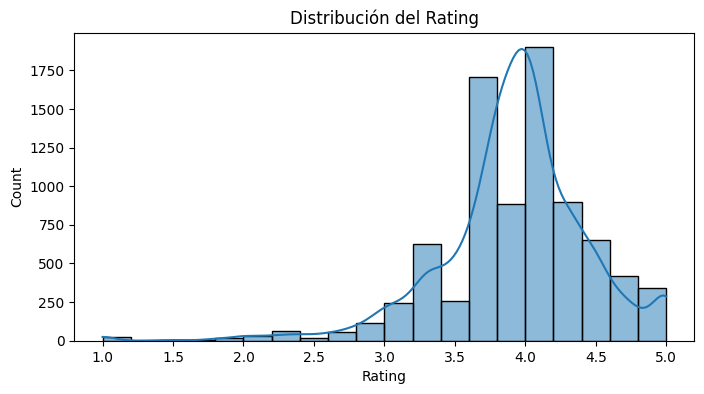

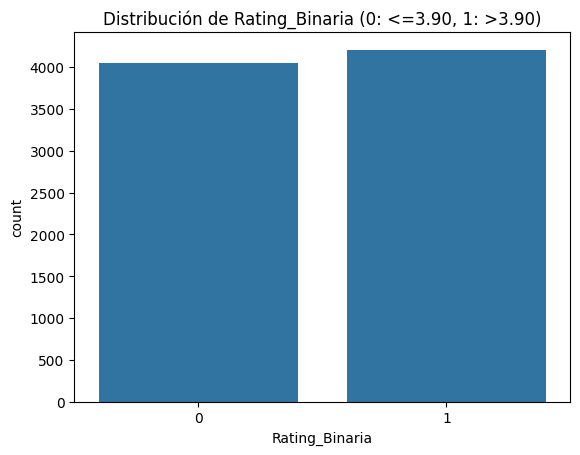

In [9]:
import matplotlib.pyplot as plt #Importada biblioteca matplitlib
import seaborn as sns           #Importada biblioteca seaborn

#Histograma de Rating (Valuacion o clasificacion)
#Muestra la concentracion de los ratings visualmente
plt.figure(figsize=(8,4))
sns.histplot(df_bangalore['Rating'], bins=20, kde=True)
plt.title('Distribución del Rating')
plt.show()

#Conteo de Rating_Binaria
#Mostrada en columnas para el 0 y 1
sns.countplot(x='Rating_Binaria', data=df_bangalore)
plt.title('Distribución de Rating_Binaria (0: <=3.90, 1: >3.90)')
plt.show()